In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhancing the style of Matplotlib plots

# Read data from CSV file into a DataFrame
data = pd.read_csv("dynamic_pricing.csv")

# Display the first few rows of the DataFrame
print(data.head())  
# Prints the first few rows of the DataFrame to get an initial look at the data structure
# Helps in understanding the column names, data types, and some sample values in the dataset

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [2]:
data.shape
# Prints the number of rows and columns in the DataFrame
# Useful to quickly understand the size and structure of the dataset
# The first value in the tuple represents the number of rows, and the second value represents the number of columns

(1000, 10)

In [3]:
data.isnull().sum().sort_values(ascending=False)
# Returns a Series with the count of missing values for each column in the DataFrame
# Sorting in descending order helps identify columns with the highest number of missing values at the top
# Useful for assessing the completeness of the dataset and deciding on potential data imputation strategies

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [4]:
print(data.describe())
# Provides summary statistics (count, mean, std, min, 25%, 50%, 75%, and max) for each numerical column
# Useful for gaining insights into the central tendency, dispersion, and shape of the distribution of each feature
# Helps in identifying potential outliers and understanding the overall distribution of the data

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

In [5]:
# Example: Create interaction term between 'Number_of_Riders' and 'Number_of_Drivers'
data['riders_drivers_interaction'] = data['Number_of_Riders'] * data['Number_of_Drivers']
# Generates a new column representing the interaction between the number of riders and the number of drivers
# Introduces a combined feature that captures the relationship between the two variables
# Useful for incorporating potential synergies or dependencies between the 'Number_of_Riders' and 'Number_of_Drivers' in the dataset

In [6]:
print (data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [7]:
data.shape

(1000, 11)

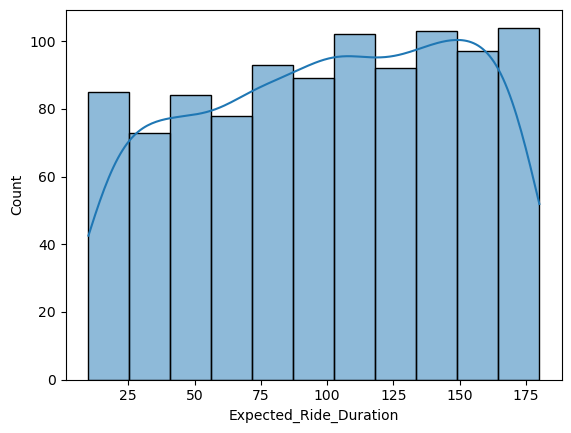

In [8]:
# Create a histogram with a kernel density estimate (KDE) for the 'Expected_Ride_Duration' column
sns.histplot(data=data,x=data['Expected_Ride_Duration'],kde=True) 
plt.show()

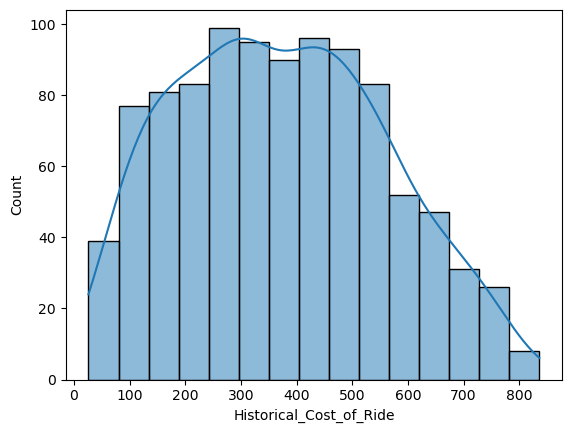

In [9]:
# Create a histogram with a kernel density estimate (KDE) for the 'Historical_Cost_of_Ride' column
sns.histplot(data=data,x=data['Historical_Cost_of_Ride'],kde=True) 
plt.show()

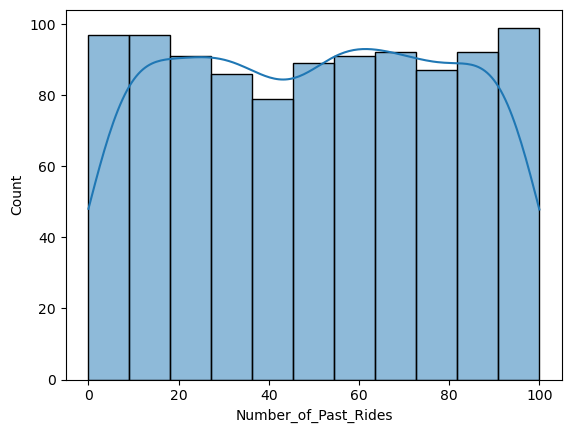

In [10]:
# Create a histogram with a kernel density estimate (KDE) for the 'Number_of_Past_Rides' column
sns.histplot(data=data,x=data['Number_of_Past_Rides'],kde=True) 
plt.show()

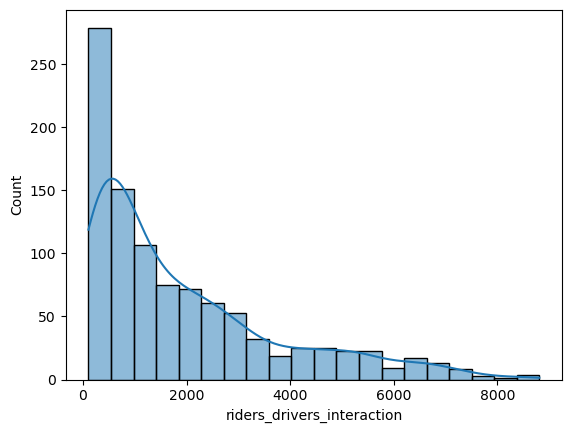

In [11]:
# Create a histogram with a kernel density estimate (KDE) for the 'riders_drivers_interaction' column
sns.histplot(data=data,x=data['riders_drivers_interaction'],kde=True)
plt.show()

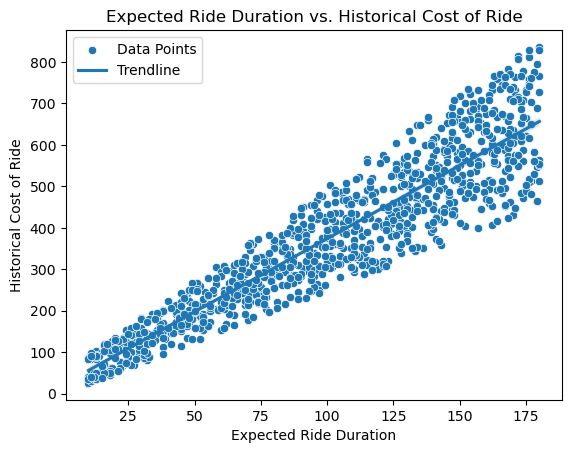

In [12]:
# Scatter plot using Seaborn with trendline
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=data, label='Data Points')
sns.regplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=data, scatter=False, label='Trendline')

plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.title('Expected Ride Duration vs. Historical Cost of Ride')
plt.legend()
plt.show()
# Generates a scatter plot to visually explore the relationship between expected ride duration and historical cost of ride
# Includes a trendline to represent the overall trend in the data
# Adds labels for the x-axis and y-axis, a title for the plot, and a legend for better interpretation
# The plot is displayed using Matplotlib's plt.show() function

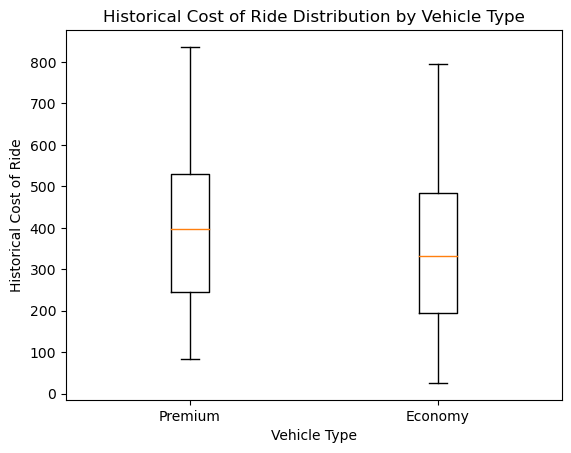

In [13]:
# Boxplot using Matplotlib
# Create a list of data arrays for each unique vehicle type to compare their historical costs
grouped_data = [data[data['Vehicle_Type'] == vehicle]['Historical_Cost_of_Ride'].values for vehicle in data['Vehicle_Type'].unique()]
plt.boxplot(grouped_data, labels=data['Vehicle_Type'].unique())
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride')
plt.title('Historical Cost of Ride Distribution by Vehicle Type')
plt.show()
# Presents a boxplot to compare the distribution of historical costs across different vehicle types
# Each box represents the interquartile range (IQR) with a median line, allowing for visual comparison of central tendency and variability
# X-axis is labeled with vehicle types, y-axis is labeled with historical costs, and a title is provided for clarity
# The plot is displayed using Matplotlib's plt.show() function

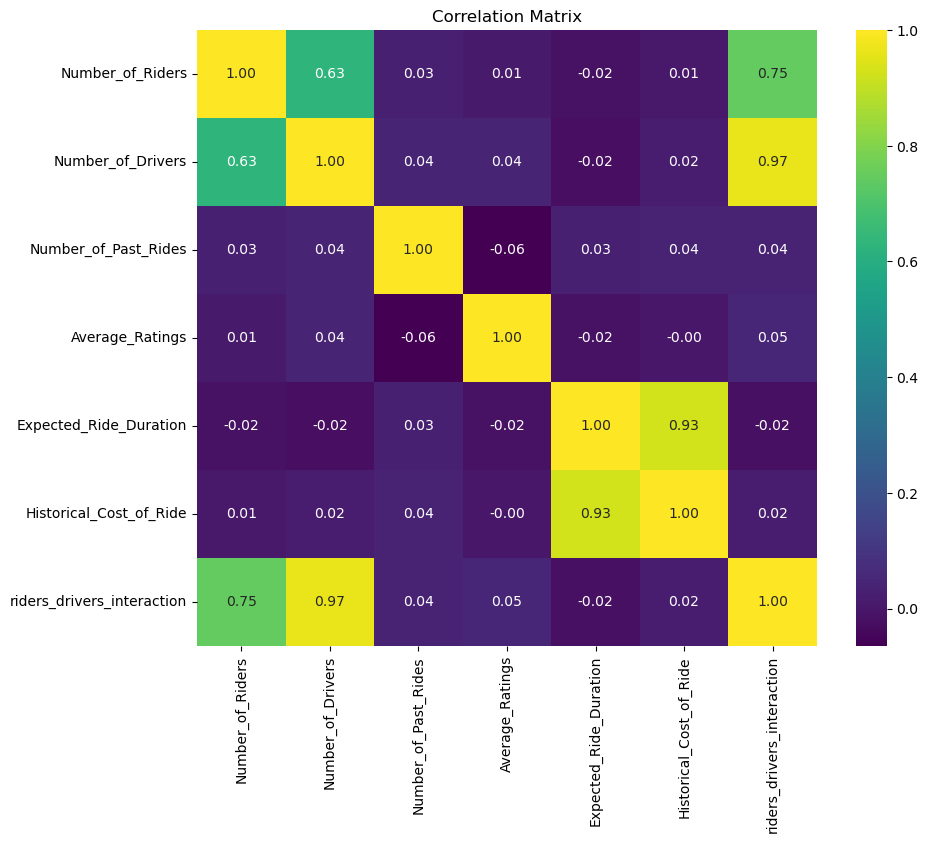

In [14]:
# Correlation matrix heatmap using Seaborn
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations, using the 'viridis' color map and displaying values with two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()
# Creates a heatmap to visualize the correlation matrix of numerical features in the dataset
# Annotations are included to display the correlation coefficients
# The 'viridis' color map is used for better color distinction, and values are formatted with two decimal places
# The plot is displayed using Matplotlib's plt.show() function

In [15]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

percentile_high_demand = np.percentile(data['Number_of_Riders'], high_demand_percentile)
percentile_low_demand = np.percentile(data['Number_of_Riders'], low_demand_percentile)

data['demand_multiplier'] = np.where(
    data['Number_of_Riders'] > percentile_high_demand,
    data['Number_of_Riders'] / percentile_high_demand,
    data['Number_of_Riders'] / percentile_low_demand
)

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

percentile_high_supply = np.percentile(data['Number_of_Drivers'], high_supply_percentile)
percentile_low_supply = np.percentile(data['Number_of_Drivers'], low_supply_percentile)

data['supply_multiplier'] = np.where(
    data['Number_of_Drivers'] > percentile_low_supply,
    percentile_high_supply / data['Number_of_Drivers'],
    percentile_low_supply / data['Number_of_Drivers']
)

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = (
    data['Historical_Cost_of_Ride'] *
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)


C:\Users\Dell\AppData\Local\Temp\ipykernel_25388\1700197498.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=1.25)


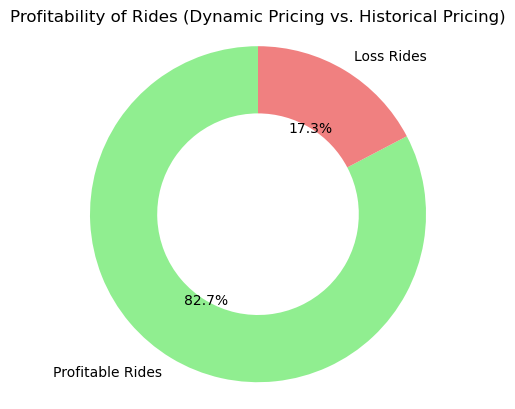

In [16]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100

# Identify profitable and loss rides
profitable_rides = data[data['profit_percentage'] > 0]
loss_rides = data[data['profit_percentage'] < 0]

# Count the number of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart using Matplotlib
labels = ['Profitable Rides', 'Loss Rides']
sizes = [profitable_count, loss_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'], wedgeprops=dict(width=0.4))

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
plt.show()

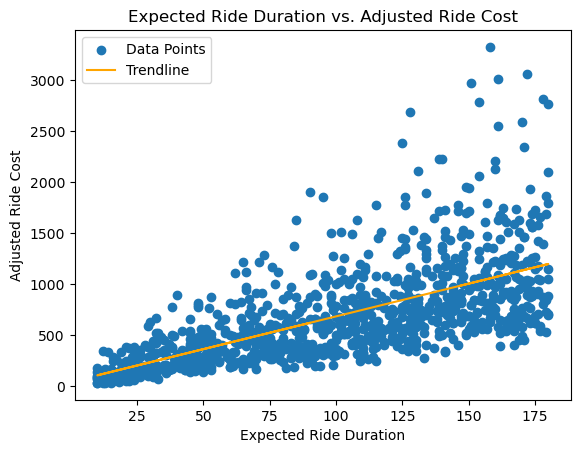

In [17]:
# Scatter plot using Matplotlib with trendline
plt.scatter(data['Expected_Ride_Duration'], data['adjusted_ride_cost'], label='Data Points')

# Calculate the coefficients for the linear trendline
coefficients = np.polyfit(data['Expected_Ride_Duration'], data['adjusted_ride_cost'], 1)

# Generate the trendline using the calculated coefficients
trendline = np.polyval(coefficients, data['Expected_Ride_Duration'])

# Plot the trendline with an orange color
plt.plot(data['Expected_Ride_Duration'], trendline, color='orange', label='Trendline')

# Label the x-axis with 'Expected Ride Duration', y-axis with 'Adjusted Ride Cost', and provide a title for the plot
plt.xlabel('Expected Ride Duration')
plt.ylabel('Adjusted Ride Cost')
plt.title('Expected Ride Duration vs. Adjusted Ride Cost')

# Display a legend for better interpretation
plt.legend()

# Show the plot
plt.show()
# Creates a scatter plot to visualize the relationship between expected ride duration and adjusted ride cost
# Calculates the coefficients for a linear trendline and generates the trendline using NumPy
# The trendline is plotted with an orange color
# X-axis is labeled with 'Expected Ride Duration', y-axis with 'Adjusted Ride Cost', and a title is provided for clarity
# A legend is displayed for better interpretation
# The plot is shown using Matplotlib's plt.show() function

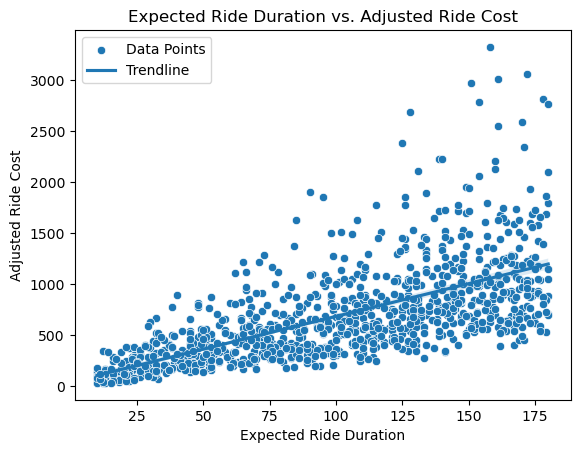

In [18]:
# Scatter plot using Seaborn with trendline
sns.scatterplot(x='Expected_Ride_Duration', y='adjusted_ride_cost', data=data, label='Data Points')
sns.regplot(x='Expected_Ride_Duration', y='adjusted_ride_cost', data=data, scatter=False, label='Trendline')

plt.xlabel('Expected Ride Duration')
plt.ylabel('Adjusted Ride Cost')
plt.title('Expected Ride Duration vs. Adjusted Ride Cost')
plt.legend()
plt.show()
# Generates a scatter plot using Seaborn to visualize the relationship between expected ride duration and adjusted ride cost
# Adds a trendline using Seaborn's regplot to represent the overall trend in the data
# Labels the x-axis and y-axis, provides a title for the plot, and displays a legend for better interpretation
# The plot is shown using Matplotlib's plt.show() function

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    # Identify numeric, categorical, and new features
    """
    Applies a data preprocessing pipeline to handle missing values, outliers, and perform feature scaling.

    Parameters:
    - data (DataFrame): Input DataFrame containing the raw data.

    Returns:
    - data (DataFrame): Processed DataFrame with imputed missing values, treated outliers, and scaled features.
    """

 # Identify numeric, categorical, and new features

    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns
    new_features = ['riders_drivers_interaction', 'demand_multiplier', 'supply_multiplier', 'adjusted_ride_cost']  # Include your new feature here

    # Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    # Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    # Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    # Feature scaling for the new features
    scaler = StandardScaler()
    data[new_features] = scaler.fit_transform(data[new_features])

    return data


In [20]:
# Convert 'Vehicle_Type' categorical variable to binary numeric values
data["Vehicle_Type"] = data["Vehicle_Type"].replace({"Premium": 1, "Economy": 0})
# Replaces the categorical values 'Premium' with 1 and 'Economy' with 0 in the 'Vehicle_Type' column
# This transformation is useful when numeric representations are needed for machine learning models
# For example, converting vehicle types to binary values where 'Premium' is represented as 1 and 'Economy' as 0

In [21]:
# Import necessary libraries for the machine learning process
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Include the interaction term in the feature set along with other relevant features
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration", "riders_drivers_interaction"]])

# Extract the target variable
y = np.array(data["adjusted_ride_cost"])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Splits the dataset into training and testing sets, with 80% for training and 20% for testing
# The random_state ensures reproducibility of the split

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)
# Fits the Random Forest Regressor model to the training data, learning the relationships between features and target variable
# The trained model is ready for making predictions on new data

RandomForestRegressor(random_state=42)

In [22]:
# Function to convert vehicle type to numeric representation
def get_vehicle_type_numeric(vehicle_type):
    """
    Converts the categorical 'vehicle_type' to a numeric representation.

    Parameters:
    - vehicle_type (str): The original vehicle type ('Premium' or 'Economy').

    Returns:
    - numeric_representation (int or None): Numeric representation of the vehicle type (1 for 'Premium', 0 for 'Economy').
      Returns None for invalid vehicle types.
    """
    return {"Premium": 1, "Economy": 0}.get(vehicle_type)

# Function to predict ride cost using user input values
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    """
    Predicts the ride cost based on user input values using the trained Random Forest Regressor model.

    Parameters:
    - number_of_riders (int): Number of riders for the ride.
    - number_of_drivers (int): Number of drivers available.
    - vehicle_type (str): Type of vehicle ('Premium' or 'Economy').
    - Expected_Ride_Duration (float): Expected duration of the ride in minutes.

    Returns:
    - predicted_price (float): Predicted ride cost.
    """
    # Convert the categorical 'vehicle_type' to a numeric representation
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)

    # Raise an error for invalid vehicle types
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")

    # Calculate the interaction term
    interaction_term = number_of_riders * number_of_drivers

    # Create input data for prediction
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration, interaction_term]])

    # Reshape input_data to handle the shape mismatch warning
    input_data = input_data.reshape(1, -1)

    # Predict the ride cost using the trained Random Forest Regressor model
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = int(input("ENTER THE NUMBER OF RIDERS: "))
user_number_of_drivers = int(input("ENTER THE NUMBER OF DRIVERS: "))
user_vehicle_type =input("ENTER THE TYPE OF VEHICLE: ") 
Expected_Ride_Duration = int(input("ENTER THE DURATION OF RIDE: ")) 
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

ENTER THE NUMBER OF RIDERS: 30
ENTER THE NUMBER OF DRIVERS: 55
ENTER THE TYPE OF VEHICLE: Economy
ENTER THE DURATION OF RIDE: 90
Predicted price: [427.54936466]


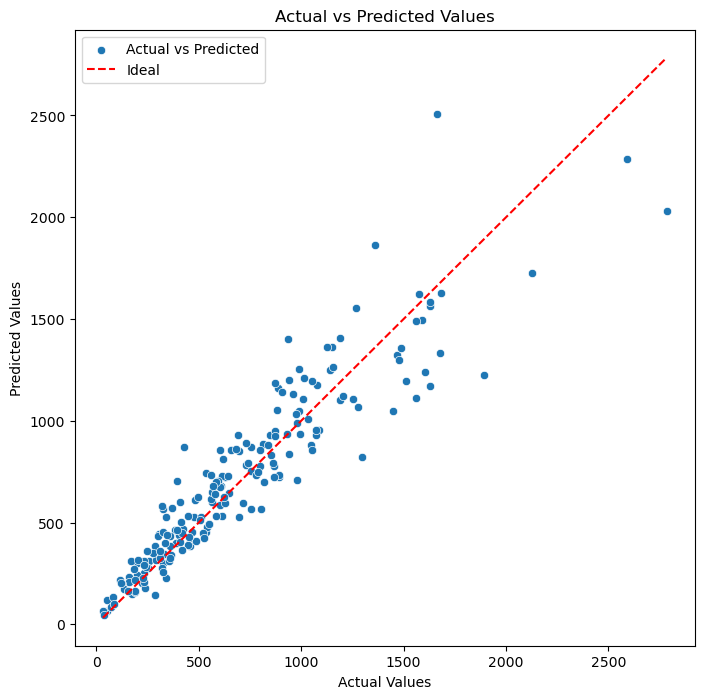

In [23]:
# Predict on the test set using the trained Random Forest Regressor model
y_pred = model.predict(x_test)

# Create a scatter plot with actual vs predicted values using Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test.flatten(), y=y_pred, label='Actual vs Predicted')

# Add a line representing the ideal case where actual values equal predicted values
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Plot a dashed red line indicating the ideal case
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal')

# Set plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Display legend for better interpretation
plt.legend()

# Show the plot
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 123.16
R-squared: 0.86
